# Baseline Model

## Libraries, Modules, Functions

In [134]:
import os
import sys
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path)

RANDOM_STATE = 101
warnings.simplefilter('ignore')
pd.set_option('display.max_columns', None)

## ETL

In [132]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True)

In [87]:
y = y.astype(np.uint8)

## Data

In [88]:
some_digit = X.loc[0]
some_digit_image = some_digit.values.reshape(28,28)

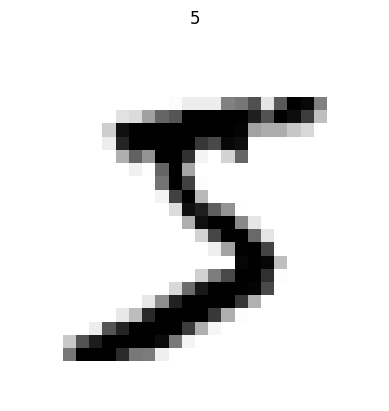

In [89]:
plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.title(y[0])
plt.show()

What other labels do `y` have?

In [90]:
y.unique()

array([5, 0, 4, 1, 9, 2, 3, 6, 7, 8], dtype=uint8)

But we need a 5-detector!

In [91]:
y = y==5

### EDA

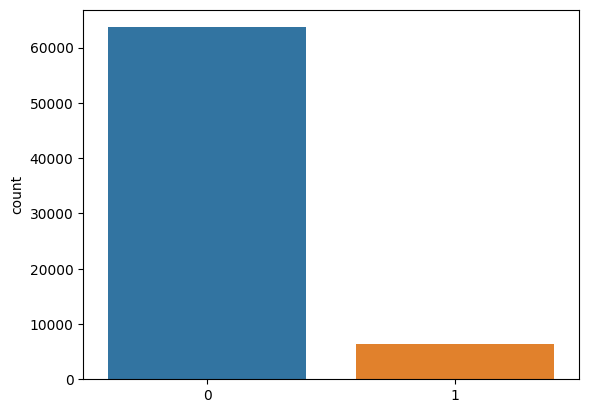

In [100]:
sns.countplot(x=y)
plt.show()

## Model 

In [111]:
from sklearn.linear_model  import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

In [103]:
sgd_clf = SGDClassifier(random_state=RANDOM_STATE, n_jobs=-1)
rf_clf = RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=-1)

### Training

In [104]:
%%time
sgd_clf.fit(X,y)

CPU times: user 14.4 s, sys: 234 ms, total: 14.6 s
Wall time: 14.8 s


SGDClassifier(n_jobs=-1, random_state=101)

In [105]:
%%time
rf_clf.fit(X,y)

CPU times: user 23.9 s, sys: 190 ms, total: 24.1 s
Wall time: 3.5 s


RandomForestClassifier(n_jobs=-1, random_state=101)

### Inference

In [112]:
%%time
sgd_clf.predict([some_digit])

CPU times: user 699 µs, sys: 386 µs, total: 1.08 ms
Wall time: 1.81 ms


array([1])

In [113]:
%%time
rf_clf.predict([some_digit])

CPU times: user 13.4 ms, sys: 7.83 ms, total: 21.2 ms
Wall time: 18.9 ms


array([1])

## Evaluation

In [53]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, classification_report

In [23]:
cross_val_score(sgd_clf, X, y, cv=3, scoring='accuracy')

array([0.96438673, 0.92709896, 0.95645652])

In [114]:
cross_val_score(rf_clf, X, y, cv=3, scoring='accuracy')

array([0.98941459, 0.98718553, 0.98692838])

Random Forest rocks!

#### Confusion Matrix

In [115]:
y_pred_sgd = cross_val_predict(sgd_clf, X, y, cv=3)

In [116]:
confusion_matrix(y, y_pred_sgd)

array([[61433,  2254],
       [ 1294,  5019]])

In [117]:
y_pred_rf = cross_val_predict(rf_clf, X, y, cv=3)

In [118]:
confusion_matrix(y, y_pred_rf)

array([[63640,    47],
       [  804,  5509]])

### Precision - Recall curve

In [119]:
y_scores_sgd = cross_val_predict(sgd_clf, X, y, cv=3, method='decision_function')

AttributeError: 'RandomForestClassifier' object has no attribute 'decision_function'

In [120]:
y_scores_rf = cross_val_predict(rf_clf, X, y, cv=3, method='predict_proba')

In [122]:
precisions_sgd, recalls_sgd, thresholds = precision_recall_curve(y, y_scores_sgd)
precisions_rf, recalls_rf, thresholds = precision_recall_curve(y, y_scores_rf[:,1])

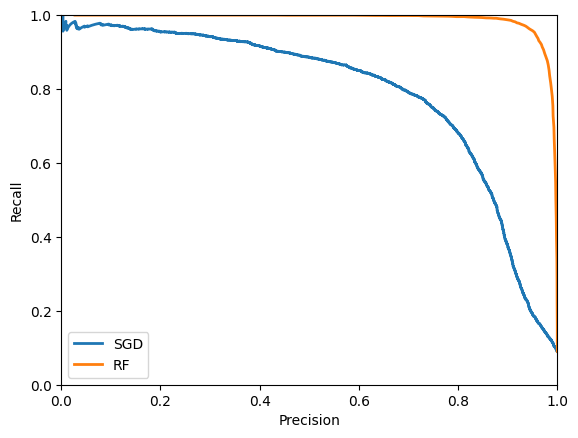

In [124]:
plt.plot(recalls_sgd[:-1], precisions_sgd[:-1], linewidth=2, label='SGD')
plt.plot(recalls_rf[:-1], precisions_rf[:-1], linewidth=2, label='RF')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.legend()
plt.show()

### ROC Curve

In [126]:
fpr_sgd, tpr_sgd, thresholds = roc_curve(y, y_scores_sgd)
fpr_rf, tpr_ef, thresholds = roc_curve(y, y_scores_rf[:,1])

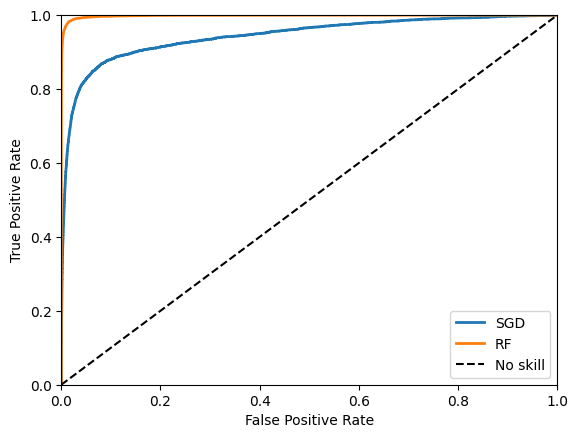

In [127]:
plt.plot(fpr_sgd, tpr_sgd, linewidth=2, label ='SGD')
plt.plot(fpr_rf, tpr_ef, linewidth=2, label ='RF')

plt.plot([0,1], [0,1], 'k--', label = 'No skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend()
plt.show()

In [130]:
print('SGD')
print(classification_report(y, y_pred_sgd, target_names=['0','1']))
print('RF')
print(classification_report(y, y_pred_rf, target_names=['0','1']))

SGD
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     63687
           1       0.69      0.80      0.74      6313

    accuracy                           0.95     70000
   macro avg       0.83      0.88      0.86     70000
weighted avg       0.95      0.95      0.95     70000

RF
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     63687
           1       0.99      0.87      0.93      6313

    accuracy                           0.99     70000
   macro avg       0.99      0.94      0.96     70000
weighted avg       0.99      0.99      0.99     70000

